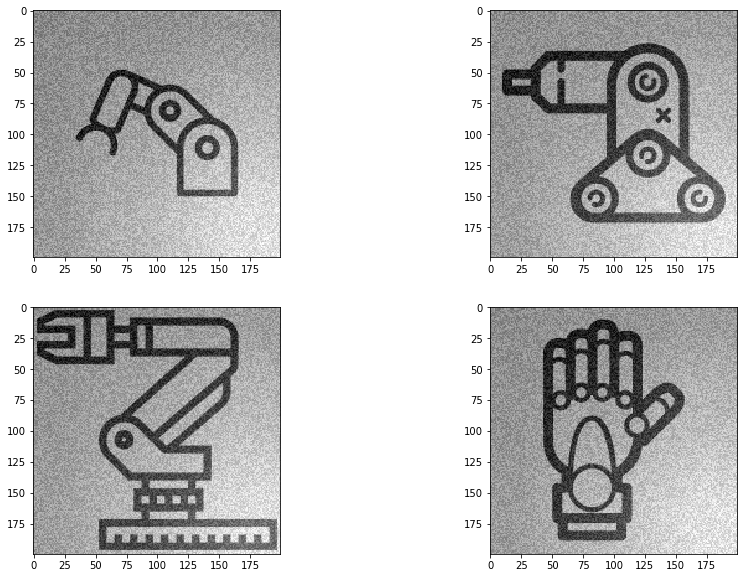

In [1]:
#reading from file
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
im1 = img.imread('Arms/4.png')
im2 = img.imread('Arms/127.png')
im3 = img.imread('Arms/196.png')
im4 = img.imread('Arms/274.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(im1,cmap='gray')
plt.subplot(222)
plt.imshow(im2,cmap='gray')
plt.subplot(223)
plt.imshow(im3,cmap='gray')
plt.subplot(224)
plt.imshow(im4,cmap='gray')

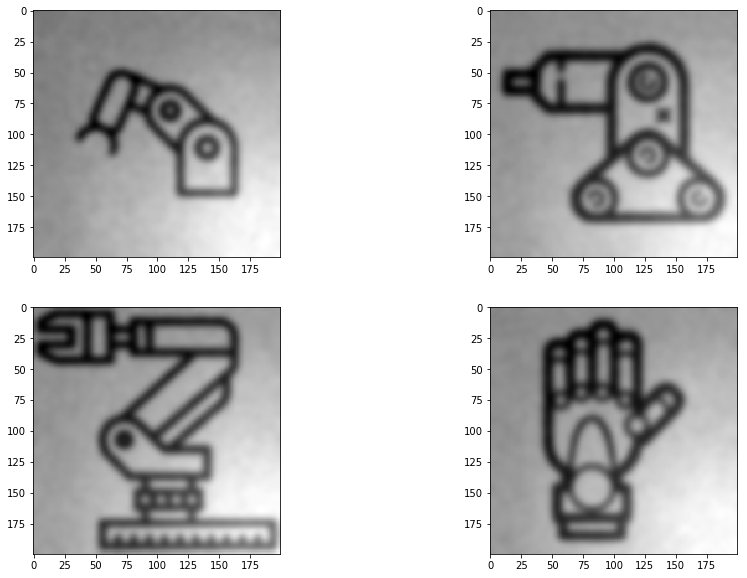

In [2]:
#gaussian_filter
from scipy import ndimage as nimg
import numpy as np
flt1 = nimg.gaussian_filter(im1, sigma=3)
flt2 = nimg.gaussian_filter(im2, sigma=3)
flt3 = nimg.gaussian_filter(im3, sigma=3)
flt4 = nimg.gaussian_filter(im4, sigma=3)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(flt1,cmap='gray')
plt.subplot(222)
plt.imshow(flt2,cmap='gray')
plt.subplot(223)
plt.imshow(flt3,cmap='gray')
plt.subplot(224)
plt.imshow(flt4,cmap='gray')

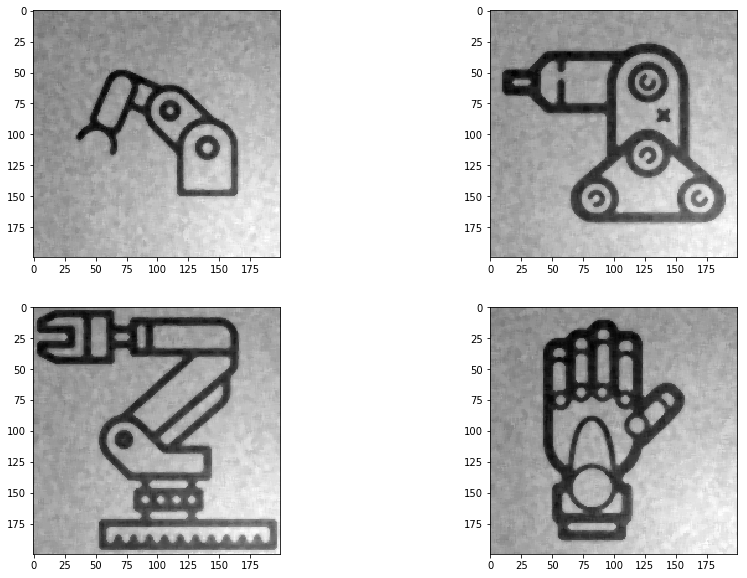

In [3]:
#median filter
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.ndimage as ndimage
%matplotlib inline
flt1 = ndimage.median_filter(im1,5)
flt2 = ndimage.median_filter(im2,5)
flt3 = ndimage.median_filter(im3,5)
flt4 =  ndimage.median_filter(im4, 5)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(flt1,cmap='gray')
plt.subplot(222)
plt.imshow(flt2,cmap='gray')
plt.subplot(223)
plt.imshow(flt3,cmap='gray')
plt.subplot(224)
plt.imshow(flt4,cmap='gray')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log2
  


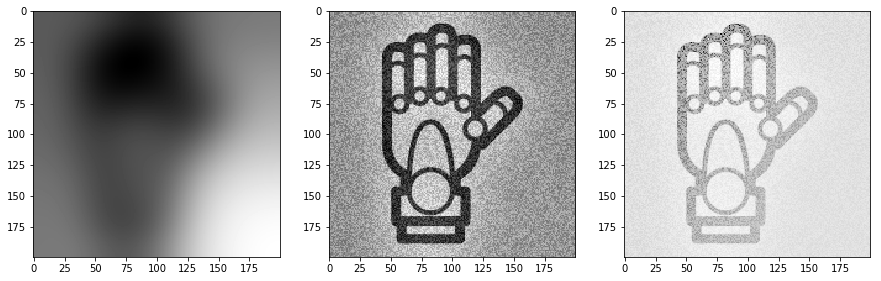

In [4]:
#Алгоритм SSR (Single-Scale Retinex
#R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(im4, sigma=20)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(im4,cmap='gray')
plt.imshow((im4-gflt),cmap='gray')
maxValue = (im4-gflt).max();
minValue = (im4-gflt).min();
sub = np.log2(im4*100)-np.log2(gflt*100);
newImage = (sub-minValue)/(maxValue-minValue)
plt.subplot(133)
plt.imshow(newImage,cmap='gray')

In [ ]:
#Алгоритм SSR (Single-Scale Retinex
#R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(im1, sigma=20)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(im1,cmap='gray')
plt.imshow((im1-gflt),cmap='gray')
maxValue = (im1-gflt).max();
minValue = (im1-gflt).min();
sub = np.log2(im1)-np.log2(gflt);
newImage = (sub-minValue)/(maxValue-minValue)
plt.subplot(133)
plt.imshow(newImage,cmap='gray')

In [ ]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import ndimage


# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [9]:
image_size = 50 # Pixel width and height.
size = image_size,image_size
pixel_depth = 255.0 # Number of levels per pixel.
sizes = [784,622,222,473]
folders = [
    r'Arms/',
    r'Figure_normal_legs/',
    r'FigureWheels/',
    r'Head/',
]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      img = Image.open(image_file)
      newImg = img.resize(size, Image.ANTIALIAS)
      image_data = (np.array(newImg).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
print(X_datasets)
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, sizes[idx]))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)
    

[]
Arms/
Full dataset tensor: (784, 50, 50)
Mean: 0.112748
Standard deviation: 0.15943
Figure_normal_legs/
Full dataset tensor: (622, 50, 50)
Mean: 0.0886578
Standard deviation: 0.17902
FigureWheels/
Full dataset tensor: (222, 50, 50)
Mean: 0.0753042
Standard deviation: 0.184759
Head/
Full dataset tensor: (473, 50, 50)
Mean: 0.0373346
Standard deviation: 0.210811


Total samples number: (2101, 50, 50)
Samples for tests: 526
Samples for trains: 1575


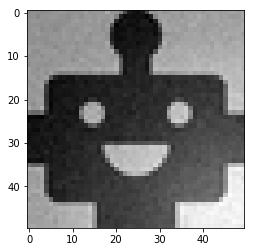

In [10]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')

In [ ]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('softmax', name="softmax"))
model.summary()

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=20, 
          batch_size=10, 
            )
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

Using TensorFlow backend.


(50, 50)
4


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_shape=(2500,), activation="relu", kernel_initializer="uniform")`
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1250, activation="relu", kernel_initializer="uniform")`
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, activation="relu", kernel_initializer="uniform")`
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, name="output", kernel_initializer="uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2500)              6252500   
_________________________________________________________________
dense_2 (Dense)              (None, 1250)              3126250   
_________________________________________________________________
dense_3 (Dense)              (None, 2500)              3127500   
_________________________________________________________________
output (Dense)               (None, 4)                 10004     
_________________________________________________________________
softmax (Activation)         (None, 4)                 0         
Total params: 12,516,254
Trainable params: 12,516,254
Non-trainable params: 0
________________________________________________________________